## **THE SPARKS FOUNDATION**
**TASK 1 - Prediction using Supervised ML**

To Predict the percentage of marks of the students based on the number of hours they studied

**Prepared by - Yash Kumar Jha**

#### Importing all the necessary libraries.

In [29]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [30]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

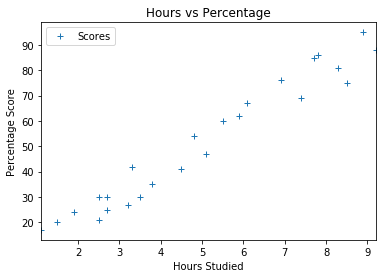

In [31]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='+')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [32]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2)

In [34]:
print("X_train")
print(X_train)
print()
print("X_test")
print(X_test)

X_train
[[4.5]
 [3.8]
 [3.5]
 [7.7]
 [1.5]
 [7.4]
 [5.1]
 [3.2]
 [5.5]
 [4.8]
 [2.7]
 [6.1]
 [5.9]
 [7.8]
 [3.3]
 [8.9]
 [8.3]]

X_test
[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]
 [2.7]
 [8.5]
 [2.5]]


### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [35]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

print("Training complete")

Training complete


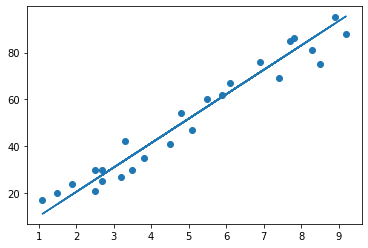

In [36]:
line = LR.coef_*X + LR.intercept_   #Line = m*x + c

plt.scatter(X,y)
plt.plot(X,line)
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [37]:
print(X_test)
y_pred = LR.predict(X_test)

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]
 [2.7]
 [8.5]
 [2.5]]


### Visualizing Actual vs Predicted Values.

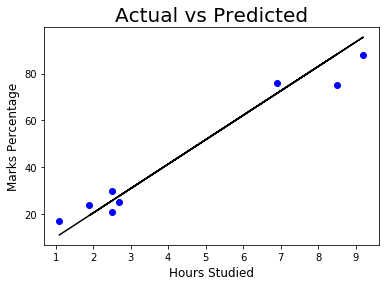

In [38]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [39]:
arr = np.array(y_test)
df = pd.DataFrame(data=arr.flatten(),columns=['Actual'])
print(df)

   Actual
0      17
1      21
2      24
3      88
4      76
5      25
6      75
7      30


In [40]:
arr1 = np.array(y_pred)
df1= pd.DataFrame(data = arr.flatten(),columns = ["Predicted"])
print(df1)

   Predicted
0         17
1         21
2         24
3         88
4         76
5         25
6         75
7         30


In [41]:
print(pd.concat([df,df1],axis = 1))

   Actual  Predicted
0      17         17
1      21         21
2      24         24
3      88         88
4      76         76
5      25         25
6      75         75
7      30         30


**What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [42]:
# You can also test with your own data
hours = 9.25
own_pred = LR.predict(np.array(hours).reshape(1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 96.01612299632008


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [43]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.936576124243741
